## Bullish on Broadway:  Fun Graphs

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime


In [46]:
index = pd.read_csv('IBDBIndex.csv', sep=',', encoding='latin-1')

In [47]:
index = index.set_index('ID')

In [48]:
df = pd.read_csv('IBDBFinal.csv', sep=',', encoding='latin-1')

In [49]:
def fill_nulls(data):
    data['GrossChange'] = data['GrossChange'].fillna(0)
    data['AttChange'] = data['AttChange'].fillna(0)
    data['TopTicket'] = data['TopTicket'].fillna(data['AvgTicket'])
    return data

df = fill_nulls(df)

In [50]:
df = df.dropna()

In [51]:
df['Week'] = pd.to_datetime(df.Week)

# Potential Capacity vs.  Attendance for Entire Run 

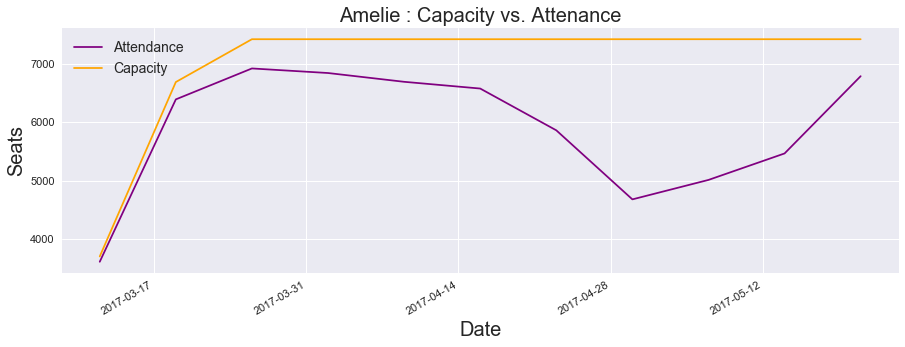

In [95]:
def graph_attendance(show):
    x = df.loc[df.ID == show, :]
    x = x.set_index('Week')
    fig, ax = plt.subplots(figsize=[15,5])
    fig.autofmt_xdate()
    plt.plot(x.index, x.Attendance, color='purple', label='Attendance')
    plt.plot(x.index, x.Capacity, color='orange', label='Capacity')
    plt.title('{}: Capacity vs. Attenance'.format(index.Show[show]), size =20)
    plt.xlabel('Date', size=20)
    plt.ylabel('Seats', size=20)
    plt.legend(loc=2, prop={'size': 14})
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15)

graph_attendance(41)

# Potential Revenue vs. Gross Revenue for Entire Run

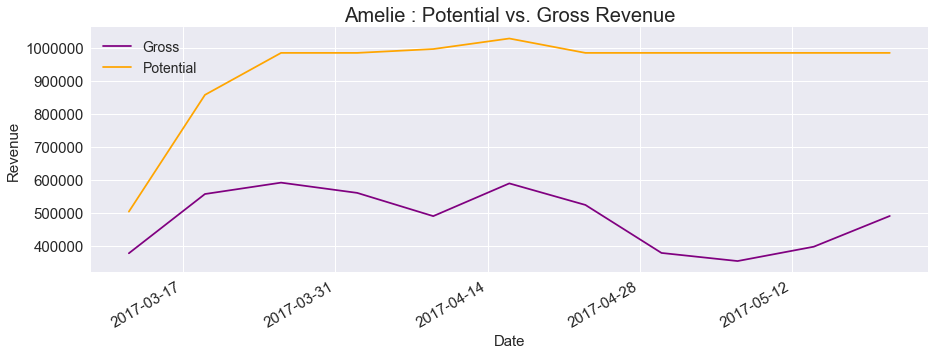

In [92]:
def graph_gross(show):
    x = df.loc[df.ID == show, :]
    x = x.set_index('Week')
    fig, ax = plt.subplots(figsize=[15,5])
    fig.autofmt_xdate()
    plt.plot(x.index, x.Gross, color='purple', label='Gross')
    plt.plot(x.index, x.Potential, color='orange', label='Potential')
    plt.title('{}: Potential vs. Gross Revenue'.format(index.Show[show]), size=20)
    plt.xlabel('Date', size=15)
    plt.ylabel('Revenue', size=15)
    plt.legend(loc=2, prop={'size': 14})
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)

graph_gross(41)

# Average Ticket vs. Premium Top Ticket for Entire Run

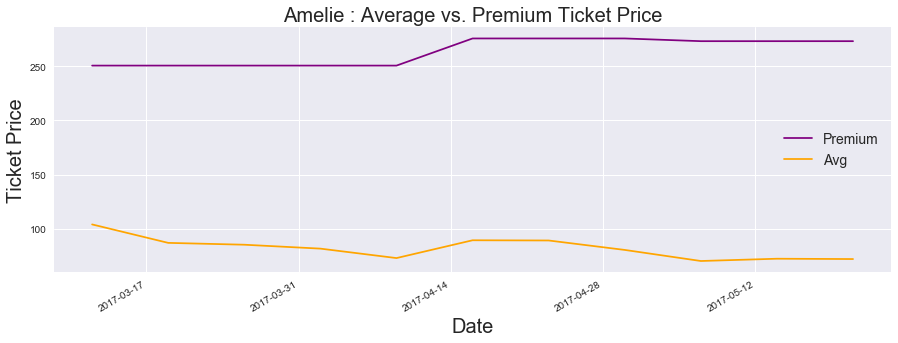

In [78]:
def graph_gross(show):
    x = df.loc[df.ID == show, :]
    x = x.set_index('Week')
    fig, ax = plt.subplots(figsize=[15,5])
    fig.autofmt_xdate()
    plt.plot(x.index, x.TopTicket, color='purple', label='Premium')
    plt.plot(x.index, x.AvgTicket, color='orange', label='Avg')
    plt.title('{}: Average vs. Premium Ticket Price'.format(index.Show[show]), size=20)
    plt.xlabel('Date', size=20)
    plt.ylabel('Ticket Price', size=20)
    plt.legend(loc=5, prop={'size': 14})

graph_gross(41)

## What's in the Data

In [98]:
data.columns

Index(['ID', 'Show', 'O_R', 'M_P', 'Genre', 'OpenMonth', 'OpenYear',
       'CloseMonth', 'CloseYear', 'Npreform', 'Coder', 'Cast_Size', 'Theatre',
       'Capacity', 'Street', 'ProdCredits', 'Special', 'Organizer'],
      dtype='object')

In [138]:
data = pd.read_csv('BroadwayBook.csv')

In [139]:
data = data.iloc[0:469]

In [140]:
data.shape

(469, 18)

In [142]:
data.O_R.value_counts()

Original    303
Revival     166
Name: O_R, dtype: int64

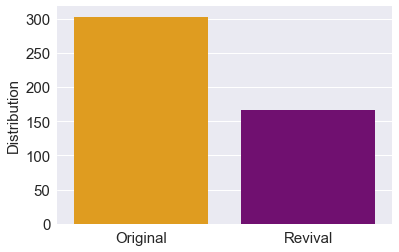

In [147]:
o_r = data.O_R.value_counts().to_frame()
sns.barplot(x= o_r.index, y= 'O_R', data = o_r, palette= ('Orange', 'Purple'))
plt.ylabel('Distribution', size=15)

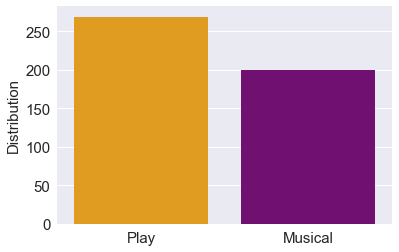

In [153]:
m_p = data.M_P.value_counts().to_frame()
sns.barplot(x= m_p.index, y= 'M_P', data = m_p, palette= ('Orange', 'Purple'))
plt.ylabel('Distribution', size=15)

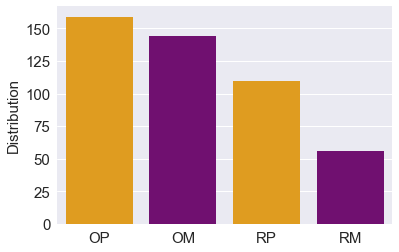

In [152]:
m_p = data.Coder.value_counts().to_frame()
sns.barplot(x= m_p.index, y= 'Coder', data = m_p, palette= ('Orange', 'Purple'))
plt.ylabel('Distribution', size=15)

In [154]:
data.columns

Index(['ID', 'Show', 'O_R', 'M_P', 'Genre', 'OpenMonth', 'OpenYear',
       'CloseMonth', 'CloseYear', 'Npreform', 'Coder', 'Cast_Size', 'Theatre',
       'Capacity', 'Street', 'ProdCredits', 'Special', 'Organizer'],
      dtype='object')

In [ ]:
openye

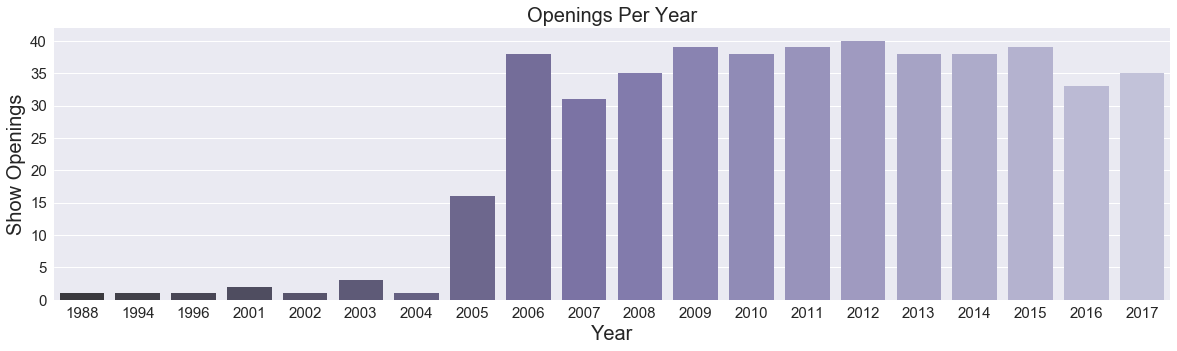

In [188]:
open_year = data.OpenYear.value_counts().to_frame()
ax = plt.figure(figsize=(20, 5)).gca()
sns.barplot(x= open_year.index.astype(int), y= 'OpenYear', data = open_year, palette= 'Purples_d')
plt.ylabel('Show Openings', size=20)
plt.xlabel('Year', size=20)
plt.title('Openings Per Year', size=20)


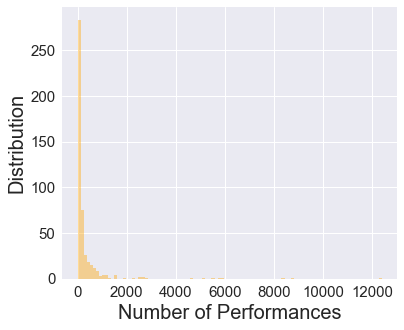

In [176]:
plt.figure(figsize=(6, 5))
sns.distplot(data.Npreform, kde= False, color= 'Orange', bins=100)
plt.ylabel('Distribution', size=20)
plt.xlabel('Number of Performances', size=20)